In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [3]:
# Import torch packages
import torch
import torchvision as torchv

# Packages that are nice to have
import numpy as np
import matplotlib.pyplot as plt
from torchsummary import summary
from pathlib import Path
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [4]:
train_dataset = torchv.datasets.MNIST(
    root='./dataset/train',
    train=True,
    download=True,
    transform=torchv.transforms.ToTensor()
)
test_dataset = torchv.datasets.MNIST(
    root='./dataset/test',
    train=False,
    download=True,
    transform=torchv.transforms.ToTensor()
)

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 9.91M/9.91M [00:00<00:00, 27.9MB/s]


Extracting ./dataset/train/MNIST/raw/train-images-idx3-ubyte.gz to ./dataset/train/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 28.9k/28.9k [00:00<00:00, 1.25MB/s]


Extracting ./dataset/train/MNIST/raw/train-labels-idx1-ubyte.gz to ./dataset/train/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 1.65M/1.65M [00:00<00:00, 4.28MB/s]


Extracting ./dataset/train/MNIST/raw/t10k-images-idx3-ubyte.gz to ./dataset/train/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 4.54k/4.54k [00:00<00:00, 4.42MB/s]

Extracting ./dataset/train/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./dataset/train/MNIST/raw



Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 9.91M/9.91M [00:00<00:00, 28.9MB/s]


Extracting ./dataset/test/MNIST/raw/train-images-idx3-ubyte.gz to ./dataset/test/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 28.9k/28.9k [00:00<00:00, 1.30MB/s]


Extracting ./dataset/test/MNIST/raw/train-labels-idx1-ubyte.gz to ./dataset/test/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 1.65M/1.65M [00:00<00:00, 9.85MB/s]


Extracting ./dataset/test/MNIST/raw/t10k-images-idx3-ubyte.gz to ./dataset/test/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 4.54k/4.54k [00:00<00:00, 4.48MB/s]

Extracting ./dataset/test/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./dataset/test/MNIST/raw



In [5]:
print(train_dataset[0])
print(type(train_dataset[0]))

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000

In [6]:
# First element of tuple. This is an image!
print(train_dataset[0][0].shape)
print(type(train_dataset[0][0]))

torch.Size([1, 28, 28])
<class 'torch.Tensor'>


In [7]:
# Second element is just a single integer!
print(train_dataset[0][1])
print(type(train_dataset[0][1]))

5
<class 'int'>


In [8]:
print(f'There are {len(train_dataset)} samples in the training dataset!')
print(f'There are {len(test_dataset)} samples in the test dataset!')
print(
    f'Thus we have {len(train_dataset) + len(test_dataset)} ' +
    'samples in total!\n' +
    f'That is, we have a total of {len(train_dataset) + len(test_dataset)} ' +
    'tuples containing a single grayscale image and a single digit integer!'
)

There are 60000 samples in the training dataset!
There are 10000 samples in the test dataset!
Thus we have 70000 samples in total!
That is, we have a total of 70000 tuples containing a single grayscale image and a single digit integer!


In [9]:
# Get the data into numpy arrays
# (convert data to numpy format to manipulate later)
train_images = train_dataset.data.numpy()
train_labels = train_dataset.targets.numpy()
test_images = test_dataset.data.numpy()
test_labels = test_dataset.targets.numpy()
print(
    f'Train Images: {train_images.shape}\n' +
    f'Train Labels: {train_labels.shape}\n' +
    f'Test Images: {test_images.shape}\n' +
    f'Test Labels: {test_labels.shape}\n'
)

Train Images: (60000, 28, 28)
Train Labels: (60000,)
Test Images: (10000, 28, 28)
Test Labels: (10000,)



In [11]:
# Combine the train and test dataset into one big dataset
all_images = np.concatenate([train_images, test_images])
all_labels = np.concatenate([train_labels, test_labels])
print(
    f'All Images: {all_images.shape}\n' +
    f'All Labels: {all_labels.shape}\n'
)

All Images: (70000, 28, 28)
All Labels: (70000,)



In [12]:
# Split the large numpy array into smaller train, validation, and test splits
choices = np.arange(len(all_labels))
# Specify the percentages of samples each set should contain
# NOTE: The last percentage is not important here since we will just
#       use the remaining images after we take out the training and validation
#       sets.
train_perc, val_perc, test_perc = (0.7, 0.2, 0.1)
# Get the number of total samples
num_samples = len(all_labels)
# Calculate the number train samples we want
num_train = int(np.floor(num_samples * train_perc))
# Calculate the number of validation samples we want
num_val = int(np.floor(num_samples * val_perc))
# Calculate the number of test samples we want
num_test = num_samples - num_train - num_val
# Show the number of samples in each
num_train, num_val, num_test

(49000, 14000, 7000)

In [13]:
# Randomly select indices throughout the whole dataset
train_idx = np.random.choice(choices, num_train, replace=False)
# Get the set difference between the whole dataset and the chosen training
# indices
choices = np.setdiff1d(choices, train_idx)
# Now get randomly choose the validation indices
val_idx = np.random.choice(choices, num_val, replace=False)
# Similarly, get the set difference but this time the resulting difference
# is, in fact, the test set.
test_idx = np.setdiff1d(choices, val_idx)
# Show index sets
train_idx, val_idx, test_idx

(array([20192, 67302, 21997, ..., 10408,  1844, 25933]),
 array([ 3178, 35804, 55365, ..., 15140, 26275, 29192]),
 array([   29,    34,    36, ..., 69981, 69989, 69993]))

In [14]:
# Ensure disjoint sets i.e. none of the elements overlap between the new
# three datasets of train, validation, and test.
np.intersect1d(np.intersect1d(train_idx, val_idx), test_idx)

array([], dtype=int64)

In [15]:
# Now we actually get all of the images and labels corresponding to their
# sets using the indices we randomly chose
train_images, train_labels = all_images[train_idx], all_labels[train_idx]
val_images, val_labels = all_images[val_idx], all_labels[val_idx]
test_images, test_labels = all_images[test_idx], all_labels[test_idx]

In [16]:
def transform(image):
    """Perform a transform on an input image. This can include normalization,
    padding, and other transformations/augmentations.

    :param image: The input image.
    :type image: Typically a numpy array.
    :return: A new transformed image.
    :rtype: _type_
    """
    x = np.pad(image, pad_width=2)
    x = np.reshape(x, (1, 32, 32))
    x = torch.Tensor(x / 255.0)
    return x


def target_transform(label):
    """Perform transformations on the label (i.e. "target").

    :param label: An input integer in this case
    :type label: A number that we should typecast to integer.
    :return: A transformed label.
    :rtype: int
    """
    x = int(label)
    return x


class MNIST_Dataset(torch.utils.data.Dataset):
    """Create a custom PyTorch dataset with all of the necessary functions to
    properly work with other PyTorch operations/functions.
    """

    def __init__(
        self,
        images,
        labels,
        transform=transform,
        target_transform=target_transform
    ):
        """The constructor for the class. Initialize variables.

        :param images: A group of images.
        :param labels: A group of labels.
        :param transform: Transform function to apply to images, 
            defaults to transform
        :type transform: function, optional
        :param target_transform: Transform function to apply to the labels,
            defaults to target_transform
        :type target_transform: function, optional
        """
        self.images = images
        self.labels = labels
        self.transform = transform
        self.target_transform = target_transform

    def __len__(self):
        """Get the length of the dataset.

        :return: The length of the labels i.e. the number of elements in the
            dataset.
        :rtype: int
        """
        return len(self.labels)

    def __getitem__(self, idx):
        """Get a single element of the dataset via its index and perform the
        necessary transforms upon it.

        :param idx: The index of the element to retrieve.
        :type idx: int
        :return: A tuple grouping the image and the label.
        :rtype: tuple
        """
        image = self.images[idx]
        label = self.labels[idx]
        if self.transform:
            image = self.transform(image)
        if self.target_transform:
            label = self.target_transform(label)
        return image, label

In [17]:
# Use our custom dataset definition class to wrap our dataset for use with other
# PyTorch tools i.e. the PyTorch dataloader.
train_dataset = MNIST_Dataset(
    train_images, train_labels, transform=transform, target_transform=target_transform)
val_dataset = MNIST_Dataset(
    val_images, val_labels, transform=transform, target_transform=target_transform)
test_dataset = MNIST_Dataset(
    test_images, test_labels, transform=transform, target_transform=target_transform)

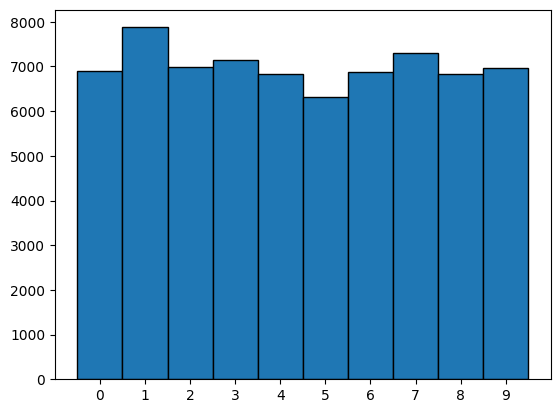

In [18]:
# Histogram showing the frequency of each class in the dataset
plt.hist(all_labels, bins=np.arange(11) - 0.5, edgecolor='black')
plt.xticks(range(10))
plt.show()

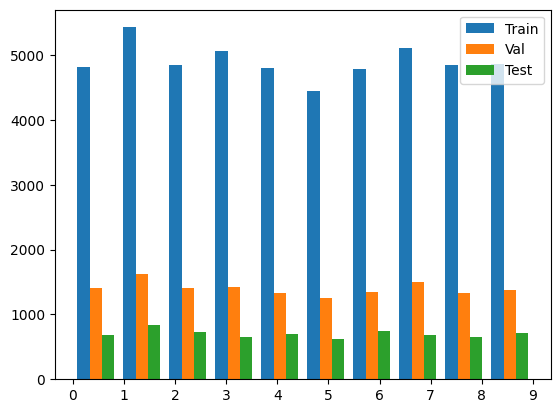

In [19]:
# Frequencies of each class in the 3 separate datasets
labels = np.unique(train_labels)
plt.hist([train_labels, val_labels, test_labels])
plt.xticks(labels)
plt.legend(['Train', 'Val', 'Test'])

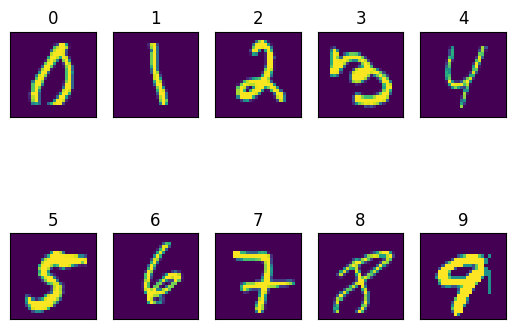

In [20]:
# Displaying one sample of each class
visualization_samples = []
plt.subplot(2, 5, 1)
for i in range(10):
    indices = np.where(train_labels == i)[0]
    rand_idx = indices[np.random.randint(0, len(indices) - 1)]
    plt.subplot(2, 5, i+1)
    plt.imshow(np.squeeze(train_images[rand_idx]))
    plt.yticks([])
    plt.xticks([])
    plt.title(i)

In [21]:
# In this tutorial, we will use a batch size of 32 whilst training
BATCH_SIZE = 32

In [22]:
# Here we initialize the Dataloaders, set the batch size to load BATCH_SIZE
# samples at a time and also perform a random shuffle of the samples within
# each set of data.
train_dataloader = torch.utils.data.DataLoader(
    train_dataset,
    batch_size=BATCH_SIZE,
    shuffle=True
)
val_dataloader = torch.utils.data.DataLoader(
    val_dataset,
    batch_size=BATCH_SIZE,
    shuffle=True
)
test_dataloader = torch.utils.data.DataLoader(
    test_dataset,
    batch_size=BATCH_SIZE,
    shuffle=True
)

In [23]:
# We have 10 different classes of data we want to differentiate between
# (i.e. the handwritten single digit number zero thru nine)
NUM_CLASSES = 10

In [24]:
class OGLeNet5(torch.nn.Module):
    def __init__(self):
        super().__init__()
        # Define the layers
        self.conv1 = torch.nn.Conv2d(
            in_channels=1,
            out_channels=6,
            kernel_size=5,
            stride=1,
            padding=0
        )
        self.avgpool1 = torch.nn.AvgPool2d(kernel_size=2, stride=2)
        self.conv2 = torch.nn.Conv2d(
            in_channels=6,
            out_channels=16,
            kernel_size=5,
            stride=1,
            padding=0
        )
        self.avgpool2 = torch.nn.AvgPool2d(kernel_size=2, stride=2)
        self.flatten = torch.nn.Flatten()
        self.linear1 = torch.nn.Linear(400, 120)
        self.linear2 = torch.nn.Linear(120, 84)
        self.linear3 = torch.nn.Linear(84, out_features=NUM_CLASSES)

    def forward(self, x):
        x = self.conv1(x)
        x = torch.functional.F.tanh(x)
        x = self.avgpool1(x)
        x = self.conv2(x)
        x = torch.functional.F.tanh(x)
        x = self.avgpool2(x)
        x = self.flatten(x)
        x = self.linear1(x)
        x = torch.functional.F.tanh(x)
        x = self.linear2(x)
        x = torch.functional.F.tanh(x)
        x = self.linear3(x)
        return x

In [25]:
original_lenet5 = OGLeNet5()
summary(original_lenet5, (1, 32, 32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 6, 28, 28]             156
         AvgPool2d-2            [-1, 6, 14, 14]               0
            Conv2d-3           [-1, 16, 10, 10]           2,416
         AvgPool2d-4             [-1, 16, 5, 5]               0
           Flatten-5                  [-1, 400]               0
            Linear-6                  [-1, 120]          48,120
            Linear-7                   [-1, 84]          10,164
            Linear-8                   [-1, 10]             850
Total params: 61,706
Trainable params: 61,706
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.06
Params size (MB): 0.24
Estimated Total Size (MB): 0.30
----------------------------------------------------------------


In [26]:
class ModernLeNet5(torch.nn.Module):
    def __init__(self):
        super().__init__()
        # Define the layers
        self.conv1 = torch.nn.Conv2d(
            in_channels=1,
            out_channels=6,
            kernel_size=5,
            stride=1,
            padding=0
        )
        self.batchnorm1 = torch.nn.BatchNorm2d(6)
        self.maxpool1 = torch.nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv2 = torch.nn.Conv2d(
            in_channels=6,
            out_channels=16,
            kernel_size=5,
            stride=1,
            padding=0
        )
        self.batchnorm2 = torch.nn.BatchNorm2d(16)
        self.maxpool2 = torch.nn.MaxPool2d(kernel_size=2, stride=2)
        self.flatten = torch.nn.Flatten()
        self.linear1 = torch.nn.Linear(400, 120)
        self.linear2 = torch.nn.Linear(120, 84)
        self.linear3 = torch.nn.Linear(84, out_features=NUM_CLASSES)

    def forward(self, x):
        x = self.conv1(x)
        x = self.batchnorm1(x)
        x = torch.functional.F.relu(x)
        x = self.maxpool1(x)
        x = self.conv2(x)
        x = self.batchnorm2(x)
        x = torch.functional.F.relu(x)
        x = self.maxpool2(x)
        x = self.flatten(x)
        x = self.linear1(x)
        x = torch.functional.F.relu(x)
        x = self.linear2(x)
        x = torch.functional.F.relu(x)
        x = self.linear3(x)
        return x

In [27]:
modern_lenet5 = ModernLeNet5()
summary(modern_lenet5, (1, 32, 32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 6, 28, 28]             156
       BatchNorm2d-2            [-1, 6, 28, 28]              12
         MaxPool2d-3            [-1, 6, 14, 14]               0
            Conv2d-4           [-1, 16, 10, 10]           2,416
       BatchNorm2d-5           [-1, 16, 10, 10]              32
         MaxPool2d-6             [-1, 16, 5, 5]               0
           Flatten-7                  [-1, 400]               0
            Linear-8                  [-1, 120]          48,120
            Linear-9                   [-1, 84]          10,164
           Linear-10                   [-1, 10]             850
Total params: 61,750
Trainable params: 61,750
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.11
Params size (MB): 0.24
Estimated Tot

In [28]:
# This is our learning rate for both models
LEARNING_RATE = 0.001

In [29]:

# Setup our loss function
loss = torch.nn.CrossEntropyLoss()

# Setup an optimizer for each of the two models
optim_original_lenet5 = torch.optim.Adam(
    original_lenet5.parameters(), lr=LEARNING_RATE)
optim_modern_lenet5 = torch.optim.Adam(
    modern_lenet5.parameters(), lr=LEARNING_RATE)

In [30]:
# Define the number of training epochs to loop of the entire dataset
NUM_EPOCHS = 10
# Determine if we should use
DEVICE = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [31]:
print(DEVICE)

cpu


In [32]:
def compute_accuracy(outputs, labels):
    """Use the outputs from the network and the expected labels to compute the
    accuracy of the network. 

    :param outputs: The output provided by running the model on input.
    :param labels: The ground-truth labels of the dataset.
    :return: The accuracy of the network based on the output of the network.
    :rtype: float
    """
    # Get the class index with the highest activation
    # In this case it corresponds to the digit with the highest likelihood of
    # being the number depicted in the input
    predictions = torch.argmax(outputs, 1)
    # Number of total predictions (i.e. the batch size)
    num_predictions = len(predictions)
    # Count the number of elements in the difference that are NOT zero
    # This indicates a mis-classification by the model
    num_incorrect = torch.count_nonzero(predictions - labels)
    # Compute the accuracy i.e. total - incorrect divided by total
    accuracy = (num_predictions - num_incorrect)/num_predictions
    return accuracy.item()

In [33]:
def train(
    train_dataloader: torch.utils.data.DataLoader,
    model: torch.nn.Module,
    loss_function,
    optimizer,
    epoch: int,
    num_epochs: int,
    total_steps: int,
    device: str
) -> tuple:
    """Perform a full iteration over the entire training dataset.

    :param train_dataloader: The dataloader to use to get the data.
    :type train_dataloader: torch.utils.data.DataLoader
    :param model: The model to train.
    :type model: torch.nn.Module
    :param loss_function: The loss function to use to compute the loss.
    :param optimizer: The optimizer to use during training.
    :param epoch: The epoch number.
    :type epoch: int
    :param num_epochs: Total number of epochs.
    :type num_epochs: int
    :param total_steps: Total number of loops due to batching.
    :type total_steps: int
    :param device: The device to train on.
    :type device: str
    :return: A tuple containing average loss and accuracy.
    :rtype: tuple
    """
    running_acc = 0.0
    running_loss = 0.0
    for i, (images, labels) in enumerate(train_dataloader):
        # Move the data to the desired training device
        images = images.to(device)
        labels = labels.to(device)

        # Perform the forward pass
        outputs = model(images)

        # Compute the loss
        loss = loss_function(outputs, labels)

        # Compute accuracy metric
        acc = compute_accuracy(outputs, labels)

        # Zero the gradients
        optimizer.zero_grad()

        # Perform the backwards pass (i.e. backpropogate the error)
        loss.backward()

        # Optimize
        optimizer.step()

        # Add the running accuracy and loss
        running_loss += loss.item()
        running_acc += acc

        # Progressively print loss
        if (i+1) % 256 == 0:
            print(
                f'TRAINING --> Epoch: {epoch+1}/{num_epochs}, ' +
                f'Step: {i+1}/{total_steps}, ' +
                f'Loss: {running_loss / (i+1)}, '
                f'Accuracy: {running_acc / (i+1)}'
            )
    # Compute the average loss and accuracy for this epoch
    running_loss = running_loss / total_steps
    running_acc = running_acc / total_steps

    return running_loss, running_acc

In [34]:
def validation(
    val_dataloader: torch.utils.data.DataLoader,
    model: torch.nn.Module,
    loss_function,
    epoch: int,
    num_epochs: int,
    total_steps: int,
    device: str
) -> tuple:
    """Perform inference over the entire validation dataset without training
    the model.

    :param val_dataloader: The validation dataset DataLoader to get data.
    :type val_dataloader: torch.utils.data.DataLoader
    :param model: The model to use to perform inference.
    :type model: torch.nn.Module
    :param loss_function: The loss function to use to compute the loss with.
    :param epoch: The current epoch number.
    :type epoch: int
    :param num_epochs: Total number of epochs.
    :type num_epochs: int
    :param total_steps: Total number of loop iteration due to batching.
    :type total_steps: int
    :param device: The device to perform inference on.
    :type device: str
    :return: The average validation loss and accuracy.
    :rtype: tuple
    """
    running_loss = 0.0
    running_acc = 0.0
    # Now we run over the validation dataset without training
    if val_dataloader:
        # Disable the gradient calculations and updates
        with torch.no_grad():
            for i, (images, labels) in enumerate(val_dataloader):
                # Transfer input data to device
                images = images.to(device)
                labels = labels.to(device)

                # Perform inference
                outputs = model(images)

                # Compute validation loss
                loss = loss_function(outputs, labels)

                # Compute validation accuracy
                acc = compute_accuracy(outputs, labels)

                # Add the running accuracy and loss
                running_loss += loss.item()
                running_acc += acc

                # Progressively print loss
                if (i+1) % 256 == 0:
                    print(
                        f'VALIDATION --> Epoch: {epoch+1}/{num_epochs}, ' +
                        f'Step: {i+1}/{total_steps}, ' +
                        f'Val Loss: {running_loss / (i+1)}, ' +
                        f'Val Acc: {running_acc / (i+1)}'
                    )
    # Compute the average loss and accuracy for this epoch
    running_loss = running_loss / total_steps
    running_acc = running_acc / total_steps

    return running_loss, running_acc

In [35]:
def save_best_model(
    model: torch.nn.Module,
    model_save_path: Path,
    val_loss: float,
    val_losses: list,
    epoch: int,
    keep_models: bool = False
):
    """Save the model if it is the first epoch. Subsequently, save the model
    only if a lower validation loss is achieved whilst training.

    :param model: The model to save.
    :type model: torch.nn.Module
    :param model_save_path: The location to save the model to.
    :type model_save_path: Path
    :param val_loss: The current epoch's validation loss.
    :type val_loss: float
    :param val_losses: The history of all other validation losses.
    :type val_losses: list
    :param epoch: The current epoch number.
    :type epoch: int
    :param keep_models: Should all models be saved, defaults to False
    :type keep_models: bool, optional
    """
    # Should we keep all models or just one
    if keep_models:
        model_save_path = model_save_path / f'model_{epoch+1}_{val_loss}.pt'
    else:
        model_save_path = model_save_path / f'model_state_dict.pt'
    # Save the first model
    if len(val_losses) == 0:
        torch.save(
            model.state_dict(),
            model_save_path
        )
        print(
            'SAVING --> First epoch: \n' +
            f'Val Loss: {val_loss}\n' +
            f'Saving new model to:\n{model_save_path}'
        )
    elif val_loss < min(val_losses):
        # If our new validation loss is less than the previous best save the
        # model
        print(
            'SAVING --> Found model with better validation loss: \n' +
            f'New Best Val Loss: {val_loss}\n' +
            f'Old Best Val Loss: {min(val_losses)}\n'
            f'Saving new model to:\n{model_save_path}'
        )
        torch.save(
            model.state_dict(),
            model_save_path
        )


In [36]:
def train_model(
    train_dataloader: torch.utils.data.DataLoader,
    model: torch.nn.Module,
    loss_function: torch.nn.CrossEntropyLoss,
    optimizer: torch.optim.Adam,
    num_epochs: int,
    device: str,
    model_save_path: Path = Path('./models'),
    val_dataloader: torch.utils.data.DataLoader = None,
) -> tuple:
    """Training loop which iterates over every image in the training dataset,
    performs the forward pass, computes the loss, and then performs the
    backwards pass. This also loops over the validation dataset and computes
    the validation loss and accuracy to determine the best model.

    See: https://pytorch.org/tutorials/beginner/introyt/trainingyt.html

    :param train_dataloader: The training dataset DataLoader to get data.
    :type train_dataloader: torch.utils.data.DataLoader
    :param model: The model to train.
    :type model: torch.nn.Module
    :param loss_function: The loss function to use to compute the loss.
    :type loss_function: torch.nn.CrossEntropyLoss
    :param optimizer: The optimizer to use in updating the weights.
    :type optimizer: torch.optim.Adam
    :param num_epochs: Total number of epoch to train for.
    :type num_epochs: int
    :param device: The device to perform training and validation on.
    :type device: str
    :param model_save_path: Save the model to, defaults to Path('./models')
    :type model_save_path: Path, optional
    :param val_dataloader: The validation dataset loader, defaults to None
    :type val_dataloader: torch.utils.data.DataLoader, optional
    :return: A tuple of shape (2, 2) that contains the history of the train
        and validation losses and accuracies.
    :rtype: tuple
    """
    print(f'Models will be saved to: {model_save_path}')
    # Lists for recording stats over epochs
    train_losses = []
    train_accs = []
    val_losses = []
    val_accs = []

    # Create the save path for the model
    if not model_save_path.exists():
        model_save_path.mkdir(exist_ok=True, parents=True)

    # Total number batches in training set
    train_total_steps = len(train_dataloader)
    val_total_steps = len(val_dataloader)

    # Perform training loop
    for epoch in range(num_epochs):
        # Enable model training
        model.train(True)

        # Enter the training function loop
        train_loss, train_acc = train(
            train_dataloader,
            model,
            loss_function,
            optimizer,
            epoch,
            num_epochs,
            train_total_steps,
            device
        )
        print(
            f'TRAINING --> Epoch {epoch+1}/{NUM_EPOCHS} DONE, ' +
            f'Avg Loss: {train_loss}, Avg Accuracy: {train_acc}'
        )

        # Enter the validation loop
        val_loss, val_acc = validation(
            val_dataloader,
            model,
            loss_function,
            epoch,
            num_epochs,
            val_total_steps,
            device
        )
        print(
            f'VALIDATION --> Epoch {epoch+1}/{NUM_EPOCHS} DONE, ' +
            f'Avg Loss: {val_loss}, Avg Accuracy: {val_acc}'
        )

        # Determine if we should save the model
        save_best_model(model, model_save_path, val_loss, val_losses, epoch)

        # Record the stats
        train_losses.append(train_loss)
        train_accs.append(train_acc)
        val_losses.append(val_loss)
        val_accs.append(val_acc)

    return (train_losses, train_accs), (val_losses, val_accs)

In [37]:
def plot_epoch_metrics(x, y, data_names, title_prefix, yaxis_label):
    """Plot metrics with the number of epochs on the x axis and the metric of
    interest on the y axis. Note that this function differs based on the input.

    :param x: The values to use on the x-axis.
    :type x: list
    :param y: A list of lists containing len(x) data points to plot. The inner
        lists are the different series to plot.
    :type y: list
    :param data_names: Names of the series to use in the legend.
    :type data_names: str
    :param title_prefix: A prefix to add before everything else in the title.
    :type title_prefix: str
    :param yaxis_label: The label for the y axis.
    :type yaxis_label: str
    """
    # Plot multiple series of data
    for i in y:
        plt.plot(x, i)
    # Set the title
    plt.title(title_prefix + ' ' + ' vs. '.join(data_names) + ' ' + yaxis_label)
    # Set the y axis label
    plt.ylabel(yaxis_label)
    # Enable the legend with the appropriate names
    plt.legend(data_names)

In [38]:
# Train the original version of LeNet5
original_lenet5.to(DEVICE)
(train_losses, train_accs), (val_losses, val_accs) = train_model(
    train_dataloader,
    original_lenet5,
    loss,
    optim_original_lenet5,
    NUM_EPOCHS,
    DEVICE,
    model_save_path=Path('./models/original_lenet5'),
    val_dataloader=val_dataloader
)
# Get the best validation loss and accuracy
print(
    f'Best Validation Loss: {min(val_losses)} ' +
    f'after epoch {np.argmin(val_losses) + 1}'
)
print(
    f'Best Validation Acc: {max(val_accs)} ' +
    f'after epoch {np.argmax(val_accs) + 1}'
)

Models will be saved to: models/original_lenet5
TRAINING --> Epoch: 1/10, Step: 256/1532, Loss: 0.7078831818944309, Accuracy: 0.7967529296875
TRAINING --> Epoch: 1/10, Step: 512/1532, Loss: 0.48984106565330876, Accuracy: 0.8575439453125
TRAINING --> Epoch: 1/10, Step: 768/1532, Loss: 0.39732509617169853, Accuracy: 0.8841145833333334
TRAINING --> Epoch: 1/10, Step: 1024/1532, Loss: 0.34184678924611944, Accuracy: 0.899627685546875
TRAINING --> Epoch: 1/10, Step: 1280/1532, Loss: 0.3023271504243894, Accuracy: 0.9107177734375
TRAINING --> Epoch 1/10 DONE, Avg Loss: 0.27283166576415185, Avg Accuracy: 0.9191416449086162
VALIDATION --> Epoch: 1/10, Step: 256/438, Val Loss: 0.1139460269259871, Val Acc: 0.96533203125
VALIDATION --> Epoch 1/10 DONE, Avg Loss: 0.11557827524938642, Avg Accuracy: 0.9653966894977168
SAVING --> First epoch: 
Val Loss: 0.11557827524938642
Saving new model to:
models/original_lenet5/model_state_dict.pt
TRAINING --> Epoch: 2/10, Step: 256/1532, Loss: 0.10474394926859532

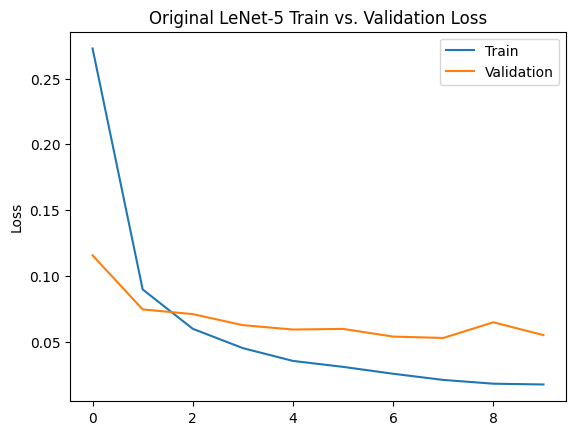

In [39]:
plot_epoch_metrics(
    np.arange(10),
    [train_losses, val_losses],
    ['Train', 'Validation'],
    'Original LeNet-5',
    'Loss'
)

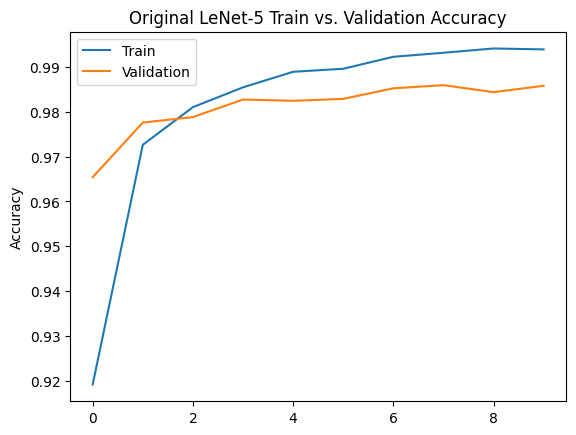

In [40]:
plot_epoch_metrics(
    np.arange(10),
    [train_accs, val_accs],
    ['Train', 'Validation'],
    'Original LeNet-5',
    'Accuracy'
)

In [41]:
# Train the modern version of LeNet5
modern_lenet5.to(DEVICE)
(train_losses, train_accs), (val_losses, val_accs) = train_model(
    train_dataloader,
    modern_lenet5,
    loss,
    optim_modern_lenet5,
    NUM_EPOCHS,
    DEVICE,
    model_save_path=Path('./models/modern_lenet5'),
    val_dataloader=val_dataloader
)
# Get the best validation loss and accuracy
print(
    f'Best Validation Loss: {min(val_losses)} ' +
    f'after epoch {np.argmin(val_losses) + 1}'
)
print(
    f'Best Validation Acc: {max(val_accs)} ' +
    f'after epoch {np.argmax(val_accs) + 1}'
)

Models will be saved to: models/modern_lenet5
TRAINING --> Epoch: 1/10, Step: 256/1532, Loss: 0.4839817057654727, Accuracy: 0.86328125
TRAINING --> Epoch: 1/10, Step: 512/1532, Loss: 0.3118728284989629, Accuracy: 0.9100341796875
TRAINING --> Epoch: 1/10, Step: 768/1532, Loss: 0.24724388162636993, Accuracy: 0.9283040364583334
TRAINING --> Epoch: 1/10, Step: 1024/1532, Loss: 0.21017335616261335, Accuracy: 0.9384765625
TRAINING --> Epoch: 1/10, Step: 1280/1532, Loss: 0.18529051851182884, Accuracy: 0.945166015625
TRAINING --> Epoch 1/10 DONE, Avg Loss: 0.16817716429026447, Avg Accuracy: 0.9499224869451697
VALIDATION --> Epoch: 1/10, Step: 256/438, Val Loss: 0.057847710978421674, Val Acc: 0.9818115234375
VALIDATION --> Epoch 1/10 DONE, Avg Loss: 0.06165865541926955, Avg Accuracy: 0.9802368721461188
SAVING --> First epoch: 
Val Loss: 0.06165865541926955
Saving new model to:
models/modern_lenet5/model_state_dict.pt
TRAINING --> Epoch: 2/10, Step: 256/1532, Loss: 0.06615309764583799, Accuracy:

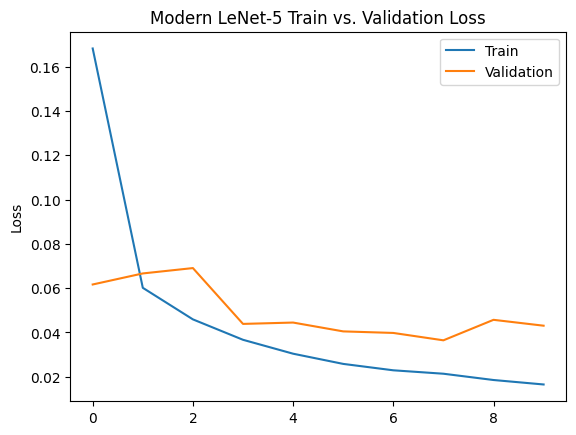

In [42]:
plot_epoch_metrics(
    np.arange(10),
    [train_losses, val_losses],
    ['Train', 'Validation'],
    'Modern LeNet-5',
    'Loss'
)

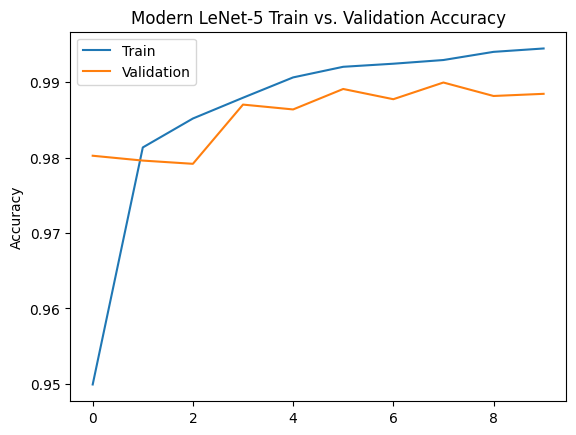

In [43]:
plot_epoch_metrics(
    np.arange(10),
    [train_accs, val_accs],
    ['Train', 'Validation'],
    'Modern LeNet-5',
    'Accuracy'
)

In [44]:
def plot_confusion_matrix(labels, predictions):
    """This function generates a confusion matrix which shows how the model
    performs over the different classes in the dataset. In other words, this
    shows which classes the model 'confuses' with one another.

    :param labels: The ground-truth labels.
    :type labels: list
    :param predictions: The predictions provided by the model.
    :type predictions: list
    """
    # Create the confusion matrix
    cm = confusion_matrix(labels, predictions)
    # Create a matplotlib display for the confusion matrix
    cm_display = ConfusionMatrixDisplay(cm, display_labels=np.arange(10))
    # Plot the data
    cm_display.plot()
    # SHow the figure
    plt.show()

In [45]:
def test_model(
    test_dataloader: torch.utils.data.DataLoader,
    model_class: torch.nn.Module,
    model_weights_path: Path,
    device: str,
    loss_function
):
    """Load the saved model and evaluate it using the test dataset to determine
    how well it was trained.

    :param test_dataloader: The test dataset DataLoader to get the data from.
    :type test_dataloader: torch.utils.data.DataLoader
    :param model_class: The model to evaluate.
    :type model_class: torch.nn.Module
    :param model_weights_path: The path the the model's weights.
    :type model_weights_path: Path
    :param device: The device to use for evaluation (i.e. inference).
    :type device: str
    :param loss_function: The loss function to use to compute the test loss.
    :return: A tuple containing the total average loss and accuracy as well as
        two list containing the predictions and ground-truth labels.
    :rtype: tuple
    """
    # Initialize the model architecture
    model: torch.nn.Module = model_class()
    # Load the weights
    model.load_state_dict(torch.load(model_weights_path, weights_only=True))
    # Enter the model into evaluation mode (i.e. DO NOT TRAIN)
    model.eval()

    # Send the model to the device to use for inference
    model.to(device)
    # Number of batched iterations
    total_steps = len(test_dataloader)
    # Vars for metrics and results
    running_loss = 0.0
    running_acc = 0.0
    all_predictions = []
    all_labels = []
    # Testing/Evaluation loop
    for i, (images, labels) in enumerate(test_dataloader):
        # Send data to the inference device
        images = images.to(device)
        labels = labels.to(device)

        # Perform inference on batched data
        outputs = model(images)

        # Compute the loss (error) between the output and the ground-truths
        loss = loss_function(outputs, labels)

        # Compute the accuracy
        accuracy = compute_accuracy(outputs, labels)

        # Keep a running loss and accuracy for computing the average
        running_loss += loss.item()
        running_acc += accuracy

        # Concatenate all of the predictions and ground-truths
        all_predictions = all_predictions + torch.argmax(outputs, 1).tolist()
        all_labels = all_labels + labels.tolist()
    # Compute the average loss and accuracy
    running_loss = running_loss / total_steps
    running_acc = running_acc / total_steps

    return running_loss, running_acc, all_predictions, all_labels

In [46]:
og_test_loss, og_test_acc, predictions, labels = test_model(
    test_dataloader,
    OGLeNet5,
    './models/original_lenet5/model_state_dict.pt',
    DEVICE,
    loss
)
print('Original LeNet-5 Inference Performance')
print(f'Test dataset contains {len(test_dataset)} samples.')
print(f'Testing Avg Loss: {og_test_loss}')
print(f'Testing Avg Acc: {og_test_acc}')

Original LeNet-5 Inference Performance
Test dataset contains 7000 samples.
Testing Avg Loss: 0.06176949884890277
Testing Avg Acc: 0.9837328767123288


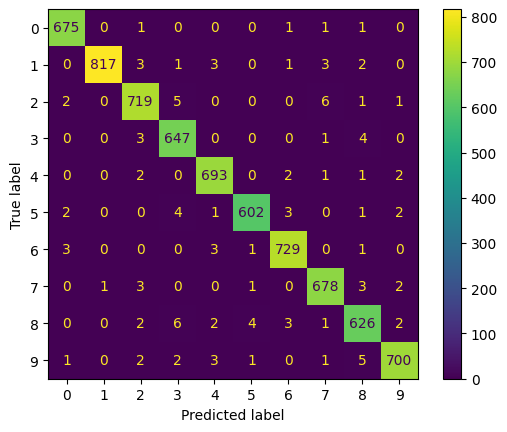

In [47]:
plot_confusion_matrix(labels, predictions)


In [48]:
modern_test_loss, modern_test_acc, predictions, labels = test_model(
    test_dataloader,
    ModernLeNet5,
    './models/modern_lenet5/model_state_dict.pt',
    DEVICE,
    loss
)
print('Modern LeNet-5 Inference Performance')
print(f'Test dataset contains {len(test_dataset)} samples.')
print(f'Testing Avg Loss: {modern_test_loss}')
print(f'Testing Avg Acc: {modern_test_acc}')

Modern LeNet-5 Inference Performance
Test dataset contains 7000 samples.
Testing Avg Loss: 0.04903900079214459
Testing Avg Acc: 0.98787100456621


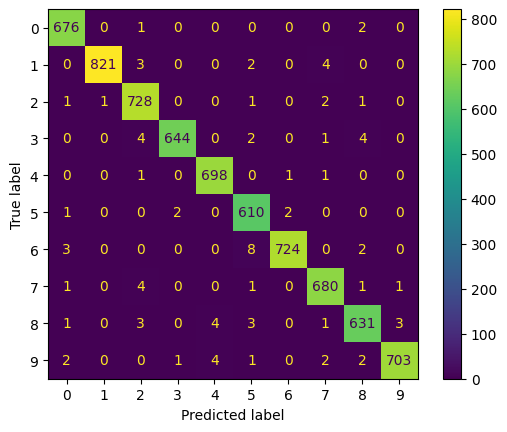

In [49]:
plot_confusion_matrix(labels, predictions)
